# HEALTHCARE Stock Analysis:

## APOLLOHOSP.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf 
import datetime

In [2]:
apoll = yf.download('APOLLOHOSP.NS', start="2019-01-01", end="2023-12-30")
apoll.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1253.0,1271.000000,1250.000000,1266.400024,1248.808350,292677
2019-01-02,1268.0,1288.000000,1251.800049,1258.750000,1241.264771,658775
2019-01-03,1258.0,1273.000000,1254.050049,1266.650024,1249.054932,322081
2019-01-04,1259.0,1297.300049,1259.000000,1293.000000,1275.038818,725206
2019-01-07,1299.0,1300.000000,1275.000000,1282.099976,1264.290405,683914


In [3]:
apoll.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [4]:
apoll.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,3214.437820,3260.478304,3166.452061,3211.894652,3195.610503,8.064910e+05
std,1510.466060,1526.401191,1491.718147,1509.056505,1508.857260,7.377831e+05
min,1094.199951,1139.000000,1047.050049,1088.849976,1079.997803,0.000000e+00
25%,1479.650024,1502.000000,1458.075012,1479.149963,1463.681396,3.908570e+05
50%,3581.000000,3649.899902,3525.000000,3588.800049,3567.604248,5.970400e+05
75%,4580.000000,4629.449951,4499.500000,4565.050049,4544.824463,9.429345e+05
max,5770.000000,5935.399902,5677.299805,5760.500000,5760.500000,8.998610e+06


In [5]:
apoll.rename(columns={"Adj Close": "price_t"}, inplace=True)
apoll.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,1253.0,1271.000000,1250.000000,1266.400024,1248.808350,292677
2019-01-02,1268.0,1288.000000,1251.800049,1258.750000,1241.264771,658775
2019-01-03,1258.0,1273.000000,1254.050049,1266.650024,1249.054932,322081
2019-01-04,1259.0,1297.300049,1259.000000,1293.000000,1275.038818,725206
2019-01-07,1299.0,1300.000000,1275.000000,1282.099976,1264.290405,683914


### Calculate daily returns.

In [6]:
apoll['daily_returns']=apoll["price_t"].pct_change() 
apoll     

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,1253.000000,1271.000000,1250.000000,1266.400024,1248.808350,292677,NaN
2019-01-02,1268.000000,1288.000000,1251.800049,1258.750000,1241.264771,658775,-0.006041
2019-01-03,1258.000000,1273.000000,1254.050049,1266.650024,1249.054932,322081,0.006276
2019-01-04,1259.000000,1297.300049,1259.000000,1293.000000,1275.038818,725206,0.020803
2019-01-07,1299.000000,1300.000000,1275.000000,1282.099976,1264.290405,683914,-0.008430
...,...,...,...,...,...,...,...
2023-12-22,5510.000000,5549.000000,5462.700195,5541.399902,5541.399902,220537,0.011971
2023-12-26,5541.399902,5645.000000,5526.149902,5633.149902,5633.149902,243281,0.016557
2023-12-27,5635.000000,5715.000000,5615.600098,5687.450195,5687.450195,307177,0.009639


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

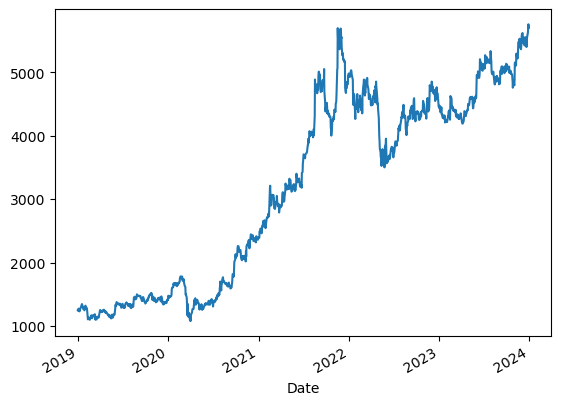

In [7]:
apoll['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

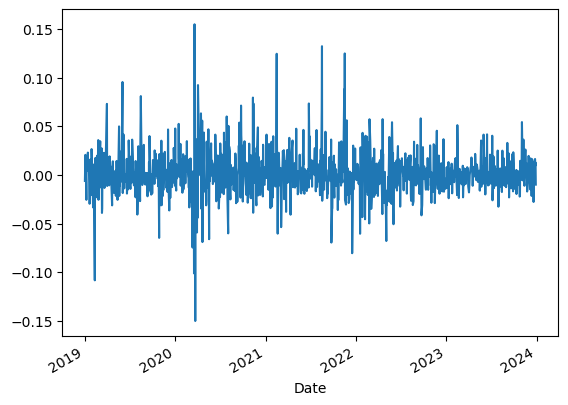

In [8]:
apoll['daily_returns'].plot() 

## Moving Average (30 day)

<Axes: xlabel='Date'>

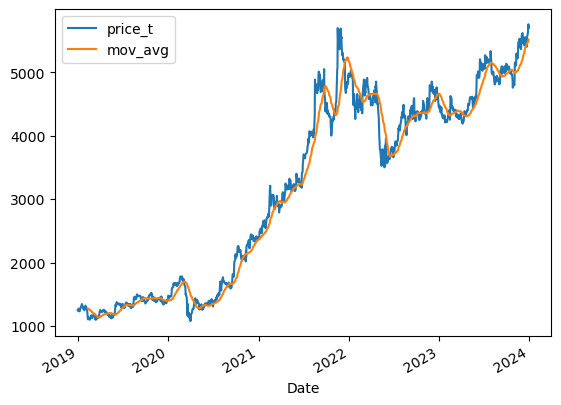

In [9]:
apoll['mov_avg']= apoll['price_t'].rolling(30).mean() 

apoll[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)

<Axes: xlabel='Date'>

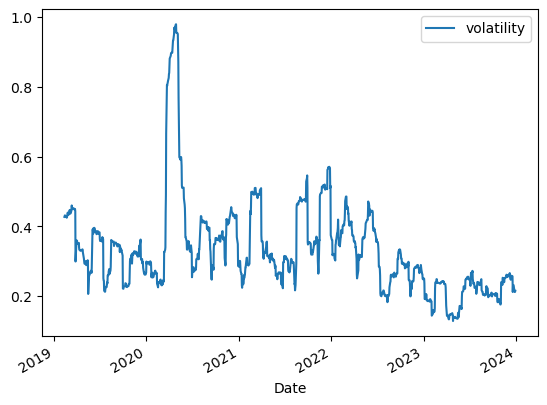

In [10]:
apoll['Log_Ret'] = np.log(apoll['price_t'] / apoll ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

apoll ['volatility'] = apoll ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

apoll [['volatility']] .plot() 

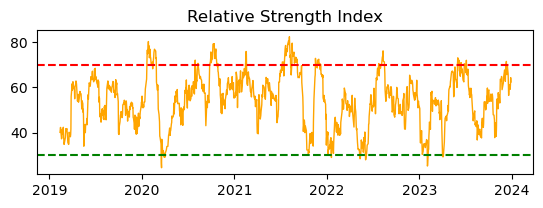

In [11]:
#### RSI (30-day)

change = apoll["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought 
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

# CIPLA:

In [12]:
cip = yf.download('CIPLA.NS', start="2019-01-01", end="2023-12-30")
cip.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,520.000000,524.000000,518.650024,523.049988,509.215485,1361809
2019-01-02,521.900024,522.500000,513.150024,514.549988,500.940338,1243067
2019-01-03,516.500000,520.500000,511.200012,512.400024,498.847229,2086150
2019-01-04,513.000000,514.900024,508.049988,512.799988,499.236572,1651456
2019-01-07,516.000000,517.750000,510.299988,514.049988,500.453522,1168002


In [13]:
cip.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [14]:
cip.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,827.858542,837.258705,817.440283,826.835466,816.048622,3.524113e+06
std,238.886324,240.376852,237.185862,238.708663,240.537456,3.932902e+06
min,370.000000,390.750000,355.299988,374.700012,367.859100,0.000000e+00
25%,570.299988,583.325012,564.799988,570.175018,559.544403,1.441138e+06
50%,898.799988,909.000000,888.150024,896.349976,884.840088,2.173427e+06
75%,982.000000,996.975006,973.099976,981.500000,969.886200,4.140088e+06
max,1270.000000,1283.550049,1254.000000,1271.500000,1271.500000,5.689521e+07


In [15]:
cip.rename(columns={"Adj Close": "price_t"}, inplace=True)
cip.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,520.000000,524.000000,518.650024,523.049988,509.215485,1361809
2019-01-02,521.900024,522.500000,513.150024,514.549988,500.940338,1243067
2019-01-03,516.500000,520.500000,511.200012,512.400024,498.847229,2086150
2019-01-04,513.000000,514.900024,508.049988,512.799988,499.236572,1651456
2019-01-07,516.000000,517.750000,510.299988,514.049988,500.453522,1168002


### Calculate daily returns.

In [16]:
cip['daily_returns']=cip["price_t"].pct_change() 
cip

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,520.000000,524.000000,518.650024,523.049988,509.215485,1361809,NaN
2019-01-02,521.900024,522.500000,513.150024,514.549988,500.940338,1243067,-0.016251
2019-01-03,516.500000,520.500000,511.200012,512.400024,498.847229,2086150,-0.004178
2019-01-04,513.000000,514.900024,508.049988,512.799988,499.236572,1651456,0.000780
2019-01-07,516.000000,517.750000,510.299988,514.049988,500.453522,1168002,0.002438
...,...,...,...,...,...,...,...
2023-12-22,1230.050049,1242.500000,1221.650024,1235.599976,1235.599976,1969524,0.011253
2023-12-26,1240.000000,1250.000000,1231.849976,1244.949951,1244.949951,820163,0.007567
2023-12-27,1247.000000,1250.349976,1236.699951,1239.750000,1239.750000,2528609,-0.004177


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

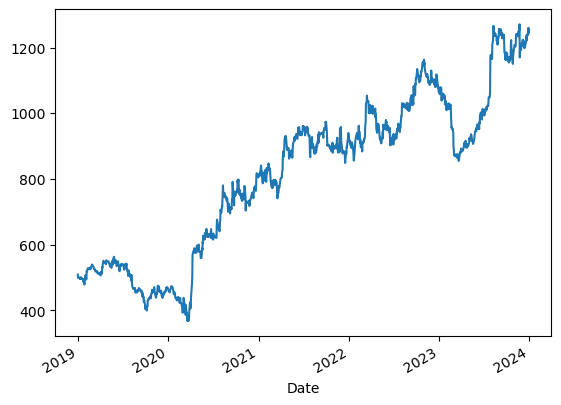

In [17]:
cip['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

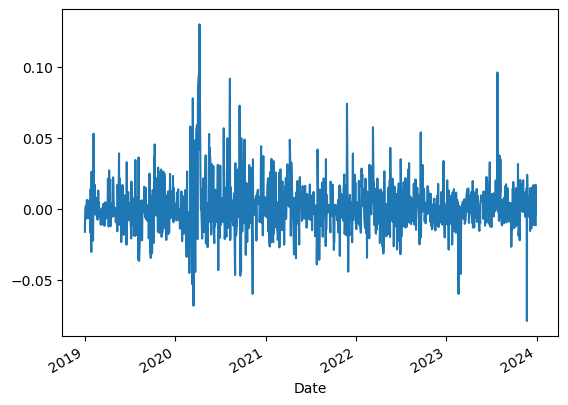

In [18]:
cip['daily_returns'].plot()

## Moving Average (30 day)

<Axes: xlabel='Date'>

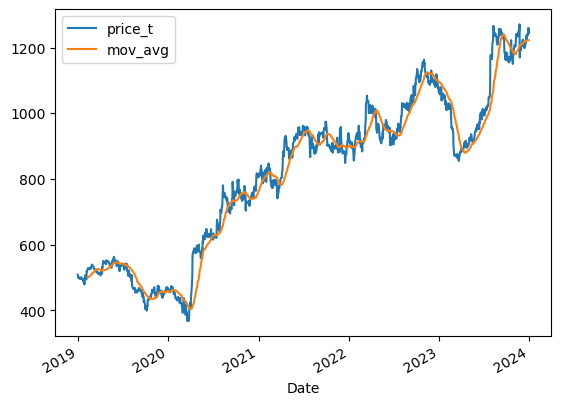

In [19]:
cip['mov_avg']= cip['price_t'].rolling(30).mean() 

cip[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)

<Axes: xlabel='Date'>

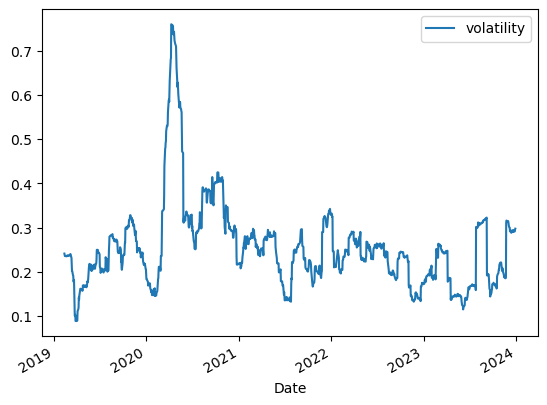

In [20]:
cip['Log_Ret'] = np.log(cip['price_t'] / cip ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

cip ['volatility'] = cip ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

cip [['volatility']] .plot() 

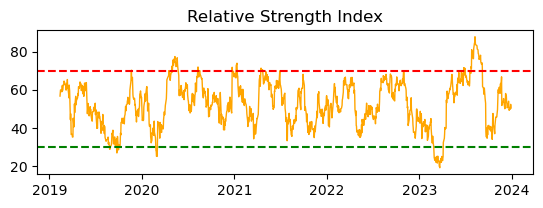

In [21]:
#### RSI (30-day)

change = cip["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought 
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

# DIVISLAB:

In [22]:
divi = yf.download('DIVISLAB.NS', start="2019-01-01", end="2023-12-30")
divi.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1485.000000,1491.050049,1469.050049,1475.449951,1420.798706,254899
2019-01-02,1476.900024,1483.599976,1461.400024,1470.900024,1416.417358,247208
2019-01-03,1479.599976,1482.800049,1432.099976,1437.900024,1384.639648,536515
2019-01-04,1437.900024,1471.199951,1428.250000,1460.500000,1406.402466,391849
2019-01-07,1470.000000,1495.000000,1461.349976,1486.000000,1430.957764,456830


In [23]:
divi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [24]:
divi.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,3199.425103,3239.097205,3156.996482,3196.700933,3146.150237,6.717492e+05
std,1055.785981,1065.343127,1043.078948,1052.961448,1047.849202,6.221236e+05
min,1437.900024,1471.199951,1428.250000,1437.900024,1384.639648,0.000000e+00
25%,2179.750000,2217.250000,2154.375000,2182.425049,2136.416748,3.399770e+05
50%,3460.000000,3499.699951,3411.800049,3450.199951,3408.032715,4.890650e+05
75%,3790.000000,3840.625000,3741.300049,3784.275024,3749.846191,7.957865e+05
max,5383.000000,5425.100098,5314.549805,5372.149902,5288.634277,7.053871e+06


In [25]:
divi.rename(columns={"Adj Close": "price_t"}, inplace=True)
divi.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,1485.000000,1491.050049,1469.050049,1475.449951,1420.798706,254899
2019-01-02,1476.900024,1483.599976,1461.400024,1470.900024,1416.417358,247208
2019-01-03,1479.599976,1482.800049,1432.099976,1437.900024,1384.639648,536515
2019-01-04,1437.900024,1471.199951,1428.250000,1460.500000,1406.402466,391849
2019-01-07,1470.000000,1495.000000,1461.349976,1486.000000,1430.957764,456830


### Calculate daily returns.

In [26]:
divi['daily_returns']=divi["price_t"].pct_change() 
divi

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,1485.000000,1491.050049,1469.050049,1475.449951,1420.798706,254899,NaN
2019-01-02,1476.900024,1483.599976,1461.400024,1470.900024,1416.417358,247208,-0.003084
2019-01-03,1479.599976,1482.800049,1432.099976,1437.900024,1384.639648,536515,-0.022435
2019-01-04,1437.900024,1471.199951,1428.250000,1460.500000,1406.402466,391849,0.015717
2019-01-07,1470.000000,1495.000000,1461.349976,1486.000000,1430.957764,456830,0.017460
...,...,...,...,...,...,...,...
2023-12-22,3650.000000,3762.899902,3643.949951,3694.949951,3694.949951,898967,0.017136
2023-12-26,3699.050049,3897.000000,3694.000000,3863.500000,3863.500000,1249185,0.045616
2023-12-27,3894.000000,3917.000000,3845.500000,3884.250000,3884.250000,598775,0.005371


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

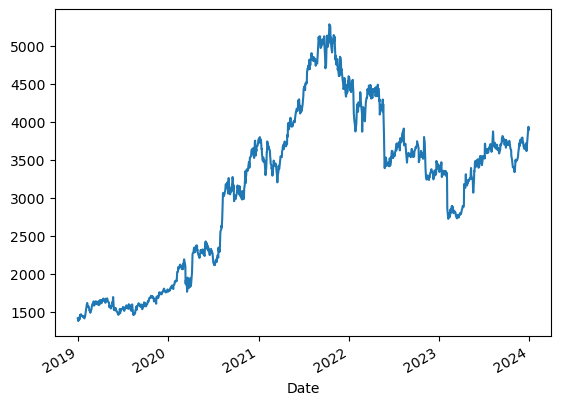

In [27]:
divi['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

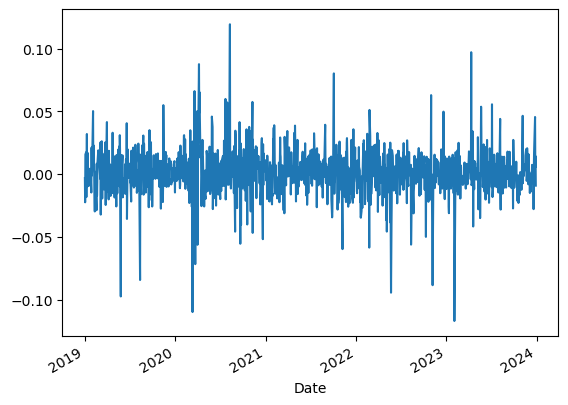

In [28]:
divi['daily_returns'].plot() 

### Moving Average (30 day)

<Axes: xlabel='Date'>

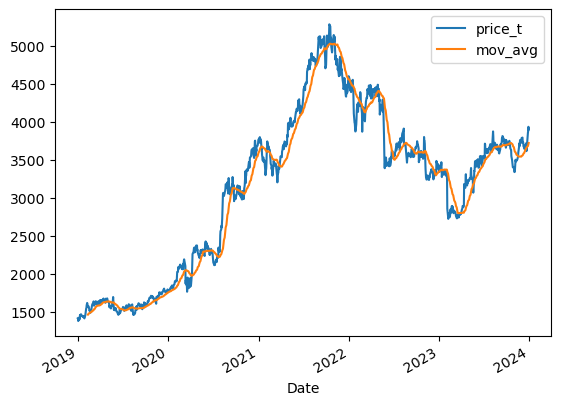

In [29]:
divi['mov_avg']= divi['price_t'].rolling(30).mean() 

divi[[ 'price_t' , 'mov_avg']].plot() 

### Volatility Measures (30 Day)

<Axes: xlabel='Date'>

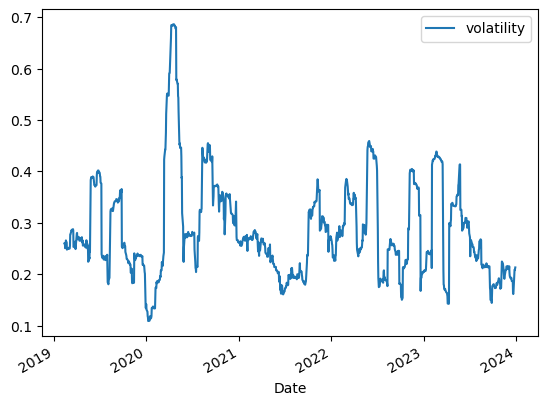

In [30]:
divi['Log_Ret'] = np.log(divi['price_t'] / divi ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

divi ['volatility'] = divi ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

divi [['volatility']] .plot() 


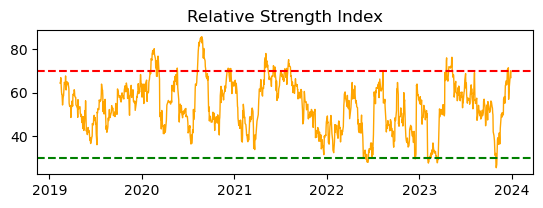

In [31]:
#### RSI (30-day)

change = divi["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought 
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

# DRREDDY

In [32]:
dr = yf.download('DRREDDY.NS', start="2019-01-01", end="2023-12-30")
dr.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,2618.100098,2634.000000,2600.000000,2607.050049,2493.476807,338757
2019-01-02,2606.000000,2618.000000,2575.050049,2601.050049,2487.738037,417551
2019-01-03,2605.000000,2614.800049,2564.000000,2577.350098,2465.070801,541891
2019-01-04,2580.000000,2606.000000,2562.000000,2600.000000,2486.733643,407397
2019-01-07,2613.850098,2613.850098,2537.300049,2558.649902,2447.184814,542415


In [33]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [34]:
dr.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,4219.354176,4264.827938,4168.469791,4214.725467,4124.426694,7.786059e+05
std,950.838363,955.761378,944.584859,947.479160,961.869606,1.030623e+06
min,2500.000000,2526.899902,1872.949951,2492.550049,2402.242188,0.000000e+00
25%,3425.400024,3668.800049,3379.099976,3602.375000,3471.857178,3.391800e+05
50%,4394.000000,4439.000000,4345.500000,4390.600098,4317.982422,5.337680e+05
75%,4886.199951,4928.625000,4826.524902,4880.850098,4776.523682,8.739990e+05
max,5980.000000,5989.700195,5912.000000,5953.350098,5953.350098,2.198708e+07


In [35]:
dr.rename(columns={"Adj Close": "price_t"}, inplace=True)
dr.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,2618.100098,2634.000000,2600.000000,2607.050049,2493.476807,338757
2019-01-02,2606.000000,2618.000000,2575.050049,2601.050049,2487.738037,417551
2019-01-03,2605.000000,2614.800049,2564.000000,2577.350098,2465.070801,541891
2019-01-04,2580.000000,2606.000000,2562.000000,2600.000000,2486.733643,407397
2019-01-07,2613.850098,2613.850098,2537.300049,2558.649902,2447.184814,542415


### Calculate daily returns.

In [36]:
dr['daily_returns']=dr["price_t"].pct_change() 
dr     

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,2618.100098,2634.000000,2600.000000,2607.050049,2493.476807,338757,NaN
2019-01-02,2606.000000,2618.000000,2575.050049,2601.050049,2487.738037,417551,-0.002302
2019-01-03,2605.000000,2614.800049,2564.000000,2577.350098,2465.070801,541891,-0.009112
2019-01-04,2580.000000,2606.000000,2562.000000,2600.000000,2486.733643,407397,0.008788
2019-01-07,2613.850098,2613.850098,2537.300049,2558.649902,2447.184814,542415,-0.015904
...,...,...,...,...,...,...,...
2023-12-22,5578.000000,5656.000000,5560.000000,5627.700195,5627.700195,263008,0.013179
2023-12-26,5627.500000,5695.000000,5602.549805,5632.149902,5632.149902,331653,0.000791
2023-12-27,5634.799805,5722.000000,5601.299805,5714.500000,5714.500000,294776,0.014621


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

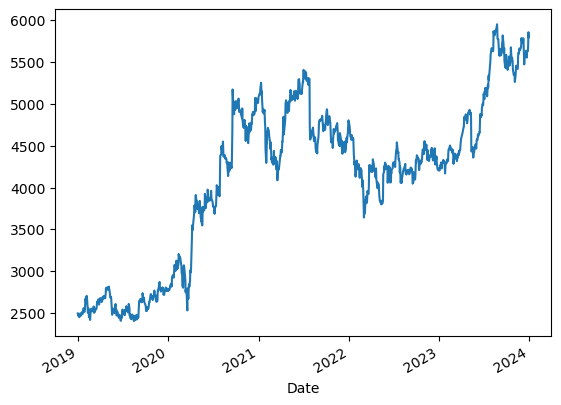

In [37]:
dr['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

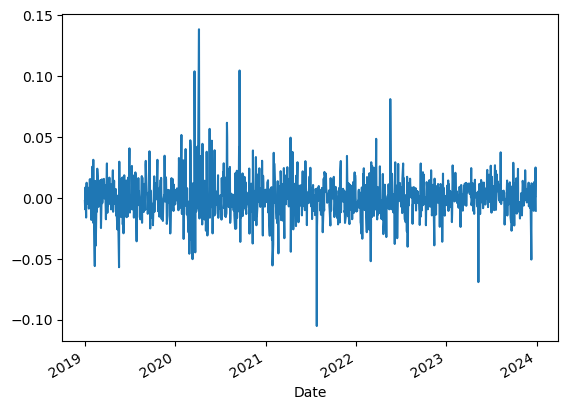

In [38]:
dr['daily_returns'].plot() 

### Moving Average (30 day)

<Axes: xlabel='Date'>

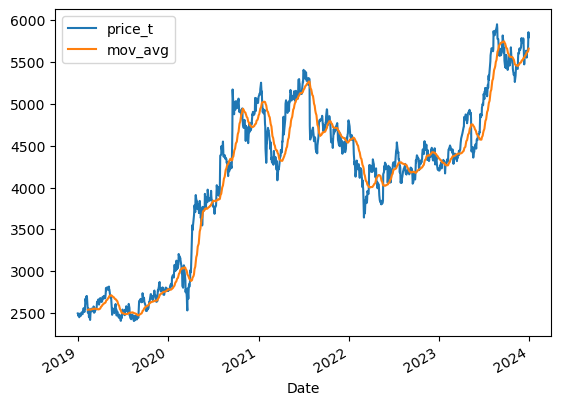

In [39]:
dr['mov_avg']= dr['price_t'].rolling(30).mean() 

dr[[ 'price_t' , 'mov_avg']].plot() 

### Volatility Measures (30 Day)

<Axes: xlabel='Date'>

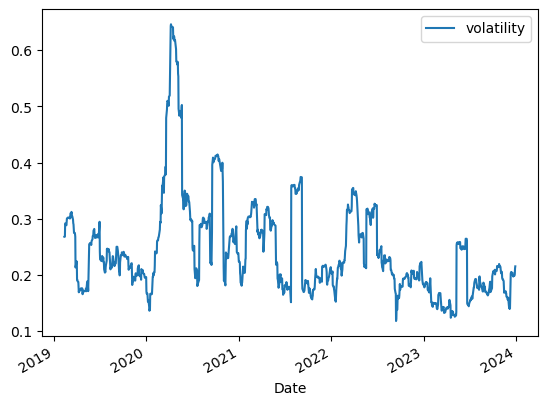

In [40]:
dr['Log_Ret'] = np.log(dr['price_t'] / dr ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

dr ['volatility'] = dr ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

dr [['volatility']] .plot() 

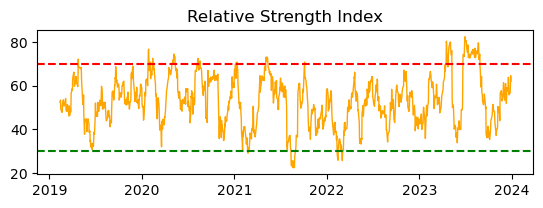

In [41]:
#### RSI (30-day)

change = dr["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought 
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

# SUNPHARMA

In [42]:
sun = yf.download('SUNPHARMA.NS', start="2019-01-01", end="2023-12-30")
sun.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,432.500000,438.799988,429.649994,433.549988,412.794830,8487116
2019-01-02,430.500000,441.200012,429.250000,440.049988,418.983734,9656878
2019-01-03,442.049988,443.600006,434.000000,436.100006,415.222870,9479511
2019-01-04,439.100006,439.899994,432.200012,433.799988,413.032898,6228693
2019-01-07,437.100006,438.000000,429.299988,430.799988,410.176544,4118235


In [43]:
sun.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [44]:
sun.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,717.208664,725.850285,708.551011,716.987085,703.298431,5.781940e+06
std,254.102407,255.074194,253.387105,254.486668,259.646478,5.880032e+06
min,321.649994,344.000000,312.000000,324.500000,313.217896,0.000000e+00
25%,464.750000,470.449997,456.850006,463.875000,442.962524,2.301711e+06
50%,688.000000,694.500000,680.049988,687.299988,670.478271,4.035628e+06
75%,932.975006,945.649994,924.225006,931.274994,924.916962,7.275879e+06
max,1264.800049,1271.949951,1252.550049,1262.150024,1262.150024,8.290621e+07


In [45]:
sun.rename(columns={"Adj Close": "price_t"}, inplace=True)
sun.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,432.500000,438.799988,429.649994,433.549988,412.794830,8487116
2019-01-02,430.500000,441.200012,429.250000,440.049988,418.983734,9656878
2019-01-03,442.049988,443.600006,434.000000,436.100006,415.222870,9479511
2019-01-04,439.100006,439.899994,432.200012,433.799988,413.032898,6228693
2019-01-07,437.100006,438.000000,429.299988,430.799988,410.176544,4118235


### Calculate daily returns.

In [46]:
sun['daily_returns']=sun["price_t"].pct_change() 
sun 

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,432.500000,438.799988,429.649994,433.549988,412.794830,8487116,NaN
2019-01-02,430.500000,441.200012,429.250000,440.049988,418.983734,9656878,0.014993
2019-01-03,442.049988,443.600006,434.000000,436.100006,415.222870,9479511,-0.008976
2019-01-04,439.100006,439.899994,432.200012,433.799988,413.032898,6228693,-0.005274
2019-01-07,437.100006,438.000000,429.299988,430.799988,410.176544,4118235,-0.006916
...,...,...,...,...,...,...,...
2023-12-22,1240.000000,1251.000000,1236.050049,1243.650024,1243.650024,2058127,0.008229
2023-12-26,1243.650024,1250.000000,1239.300049,1247.500000,1247.500000,1796483,0.003096
2023-12-27,1250.000000,1255.400024,1241.250000,1252.449951,1252.449951,2005268,0.003968


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

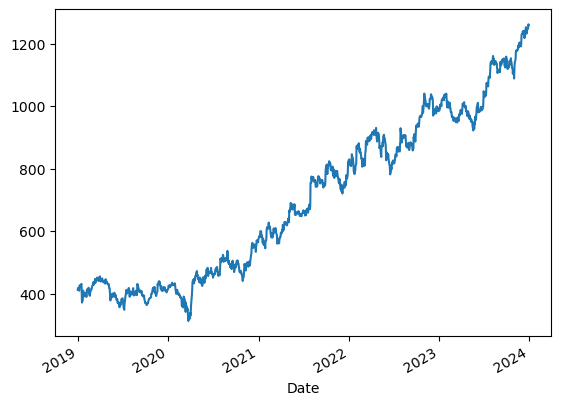

In [47]:
sun['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

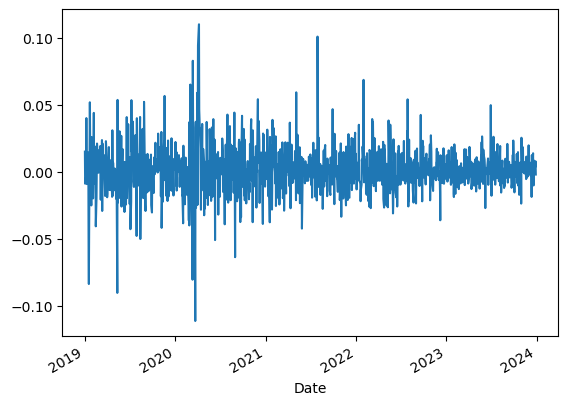

In [48]:
sun['daily_returns'].plot()

## Moving Average (30 day)

<Axes: xlabel='Date'>

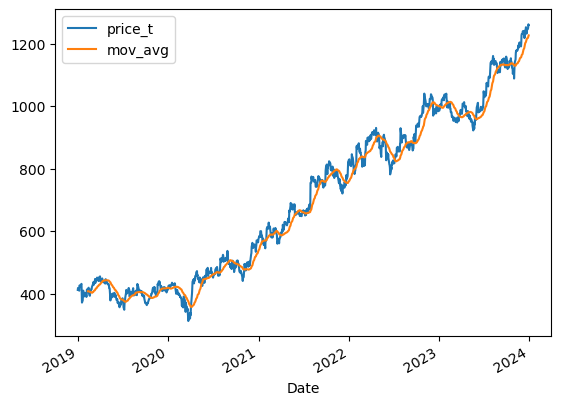

In [49]:
sun['mov_avg']= sun['price_t'].rolling(30).mean() 

sun[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)

<Axes: xlabel='Date'>

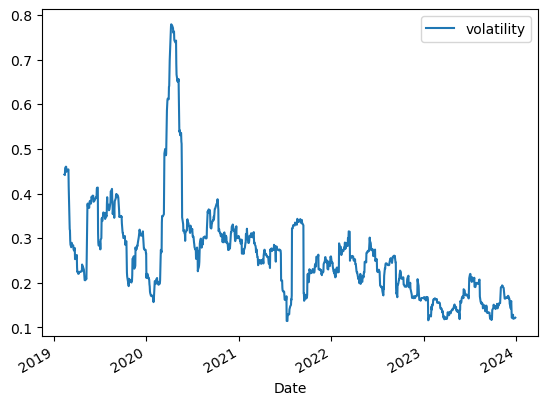

In [50]:
sun['Log_Ret'] = np.log(sun['price_t'] / sun ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

sun ['volatility'] = sun ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

sun [['volatility']] .plot() 


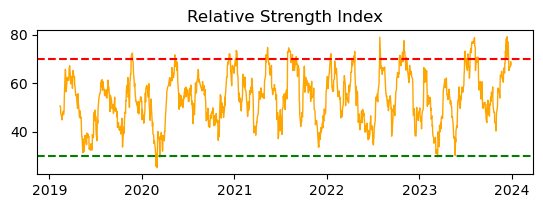

In [51]:
#### RSI (30-day)

change = sun["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought 
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## Correlation Matrix Between Stocks and Indices.

In [52]:
tkr = ['APOLLOHOSP.NS','CIPLA.NS','DIVISLAB.NS','DRREDDY.NS','SUNPHARMA.NS','^NSEI','^NSEBANK']
health = yf.download(tkr, start="2019-01-01", end="2023-12-30",group_by='tkr')

close_prices = pd.DataFrame()
for i in tkr:
    close_prices[i] = health[i]['Adj Close']

##compute the correlation matrix

corr_matrix = close_prices.corr()
corr_matrix

[*********************100%%**********************]  7 of 7 completed


,APOLLOHOSP.NS,CIPLA.NS,DIVISLAB.NS,DRREDDY.NS,SUNPHARMA.NS,^NSEI,^NSEBANK
APOLLOHOSP.NS,1.000000,0.915024,0.809150,0.750357,0.935780,0.968005,0.870457
CIPLA.NS,0.915024,1.000000,0.777678,0.850272,0.938781,0.915400,0.793071
DIVISLAB.NS,0.809150,0.777678,1.000000,0.803133,0.646890,0.739885,0.544112
DRREDDY.NS,0.750357,0.850272,0.803133,1.000000,0.730994,0.727345,0.558809
SUNPHARMA.NS,0.935780,0.938781,0.646890,0.730994,1.000000,0.950918,0.884598
^NSEI,0.968005,0.915400,0.739885,0.727345,0.950918,1.000000,0.951029
^NSEBANK,0.870457,0.793071,0.544112,0.558809,0.884598,0.951029,1.000000


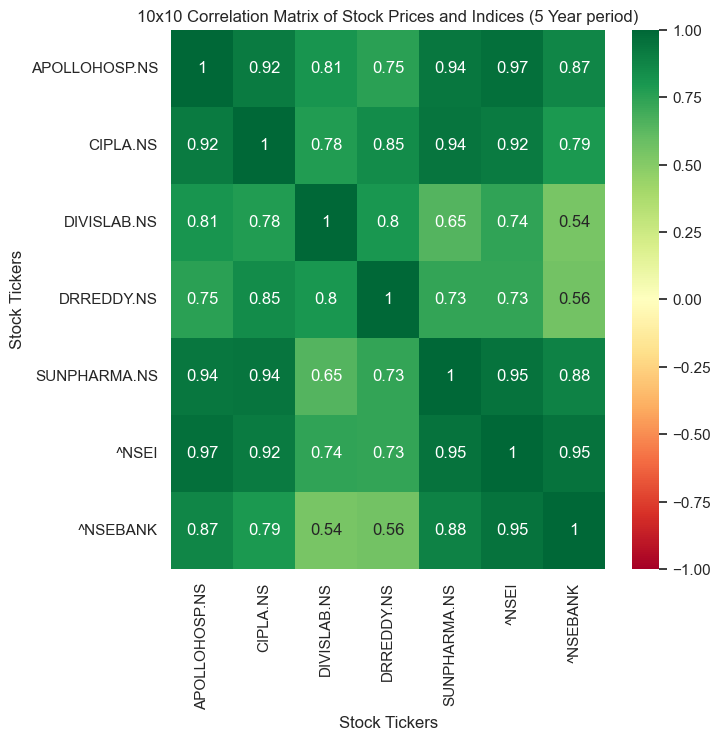

In [53]:
##create a heatmap of the correlation matrix using Seaborn

sns.set(style='white')
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=ax)# set the axis labels and title
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Stock Tickers')
ax.set_title('10x10 Correlation Matrix of Stock Prices and Indices (5 Year period)')

# display the plot
plt.show()

# Sector-wise Analysis:


### Compare and contrast the performance of stocks within each sector.


In [70]:
# Define a list of stock tickers representing each sector
health_tickers = ['APOLLOHOSP.NS', 'CIPLA.NS', 'DIVISLAB.NS','DRREDDY.NS','SUNPHARMA.NS']


# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-30')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each sector
health_data = get_stock_data(health_tickers)


# Check the retrieved data
print("Healthcare Data:")
print(health_data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Healthcare Data:
            APOLLOHOSP.NS    CIPLA.NS  DIVISLAB.NS   DRREDDY.NS  SUNPHARMA.NS
Date                                                                         
2019-01-01    1248.808350  509.215485  1420.798706  2493.476807    412.794830
2019-01-02    1241.264771  500.940338  1416.417358  2487.738037    418.983734
2019-01-03    1249.054932  498.847229  1384.639648  2465.070801    415.222870
2019-01-04    1275.038818  499.236572  1406.402466  2486.733643    413.032898
2019-01-07    1264.290405  500.453522  1430.957764  2447.184814    410.176544


### Identify sector leaders and laggards.

In [71]:
# Define a list of stock tickers representing each sector
tickers = ['APOLLOHOSP.NS', 'CIPLA.NS', 'DIVISLAB.NS','DRREDDY.NS','SUNPHARMA.NS']


# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-31')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each sector
data = get_stock_data(tickers)

# Calculate cumulative returns for each sector
cumulative_returns = (1 + data.pct_change()).cumprod()


# Calculate overall cumulative returns for each sector
overall_returns = cumulative_returns.iloc[-1, :]


# Identify leaders and laggards
leader = overall_returns.idxmax()
laggard = overall_returns.idxmin()


# Print results
print(f"Sector - Leader: {leader}, Laggard: {laggard}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Sector - Leader: APOLLOHOSP.NS, Laggard: DRREDDY.NS


# Trend Analysis:

## Moving averages to identify trends in stock prices.


### APOLLOHOSP:

[*********************100%%**********************]  1 of 1 completed


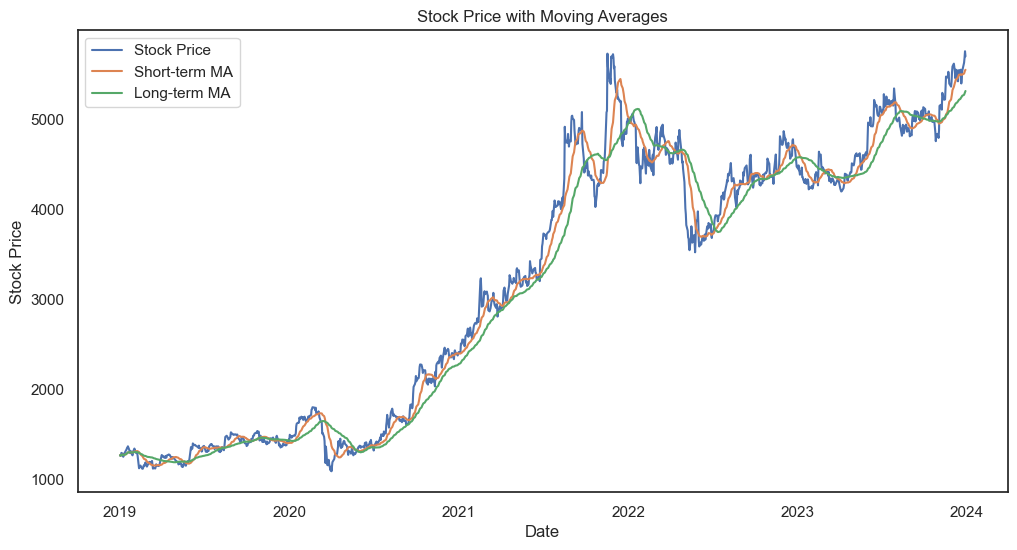

In [72]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'APOLLOHOSP.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### CIPLA:

[*********************100%%**********************]  1 of 1 completed


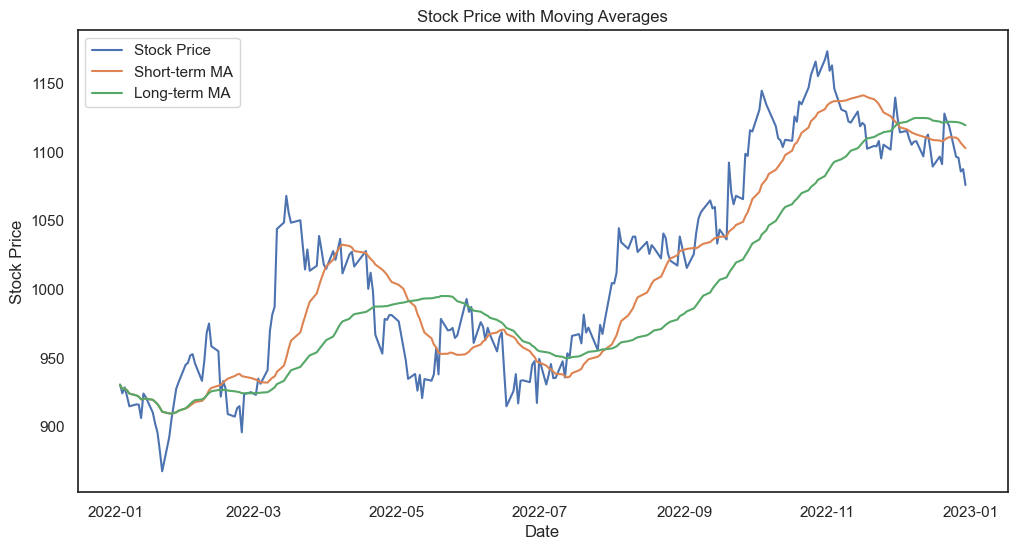

In [73]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'CIPLA.NS'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### DIVISLAB.

[*********************100%%**********************]  1 of 1 completed


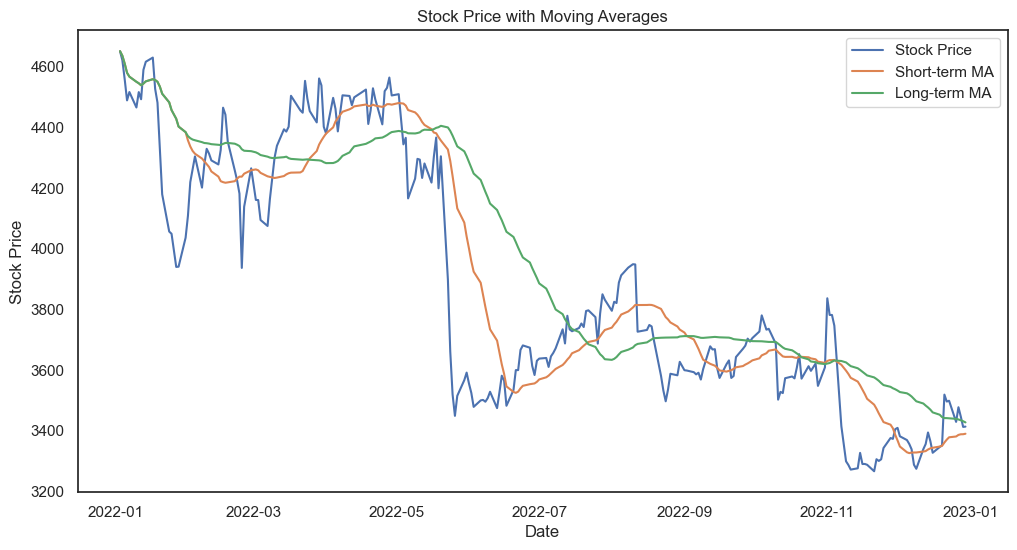

In [74]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'DIVISLAB.NS'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

## DRREDDY

[*********************100%%**********************]  1 of 1 completed


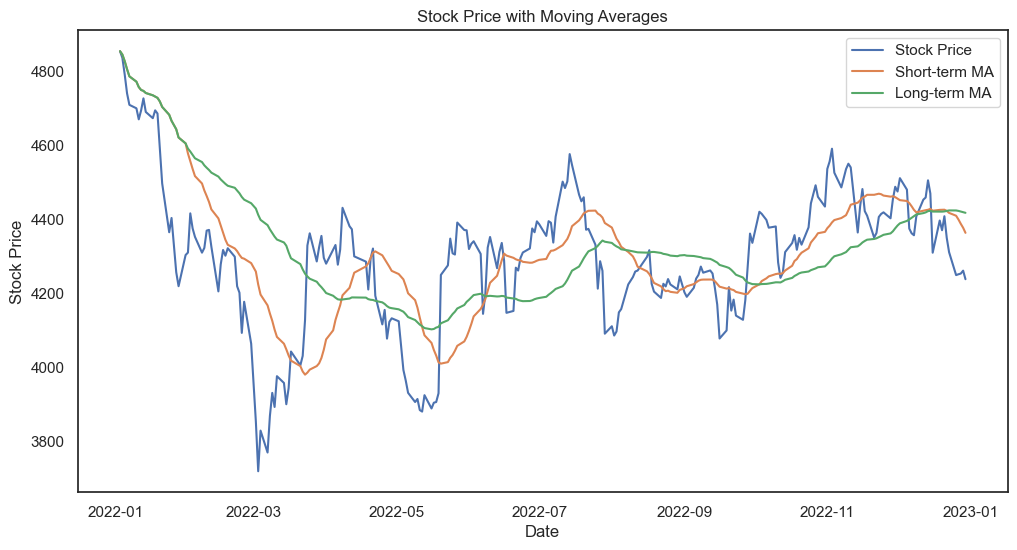

In [75]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'DRREDDY.NS'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

## SUNPHARMA

[*********************100%%**********************]  1 of 1 completed


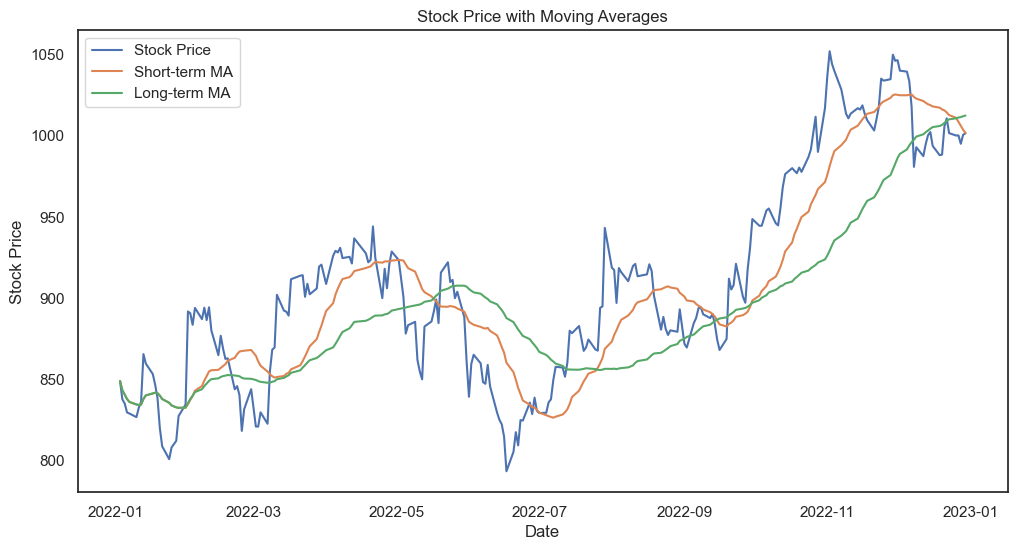

In [76]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'SUNPHARMA.NS'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

# Plot stock prices and indices over time to observe long-term trends.

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  2 of 2 completed


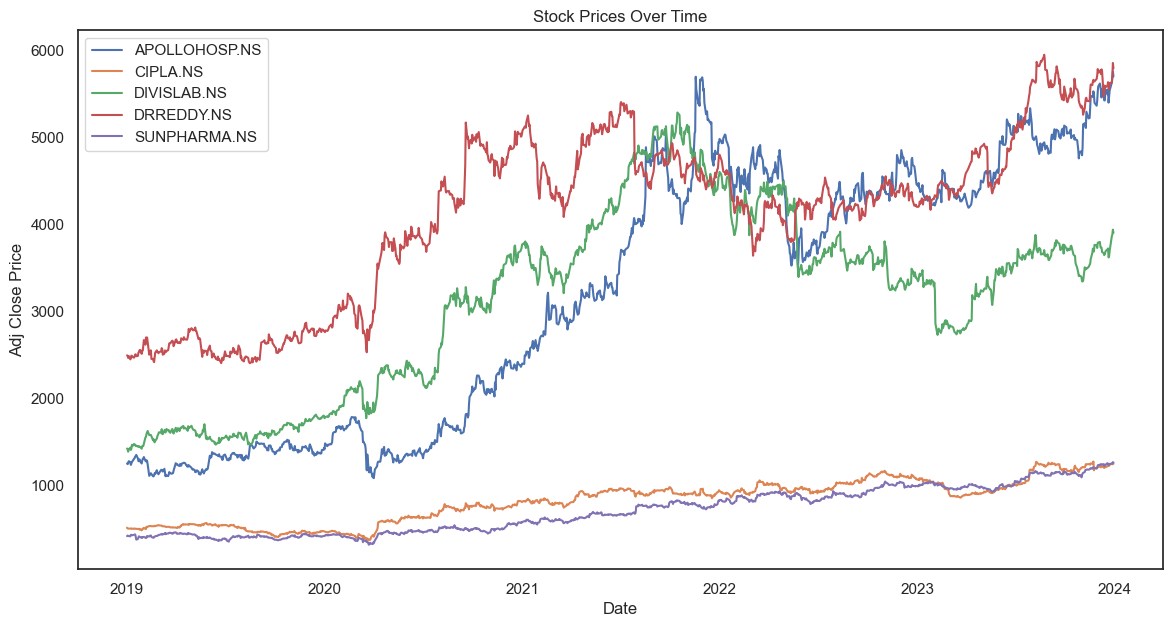

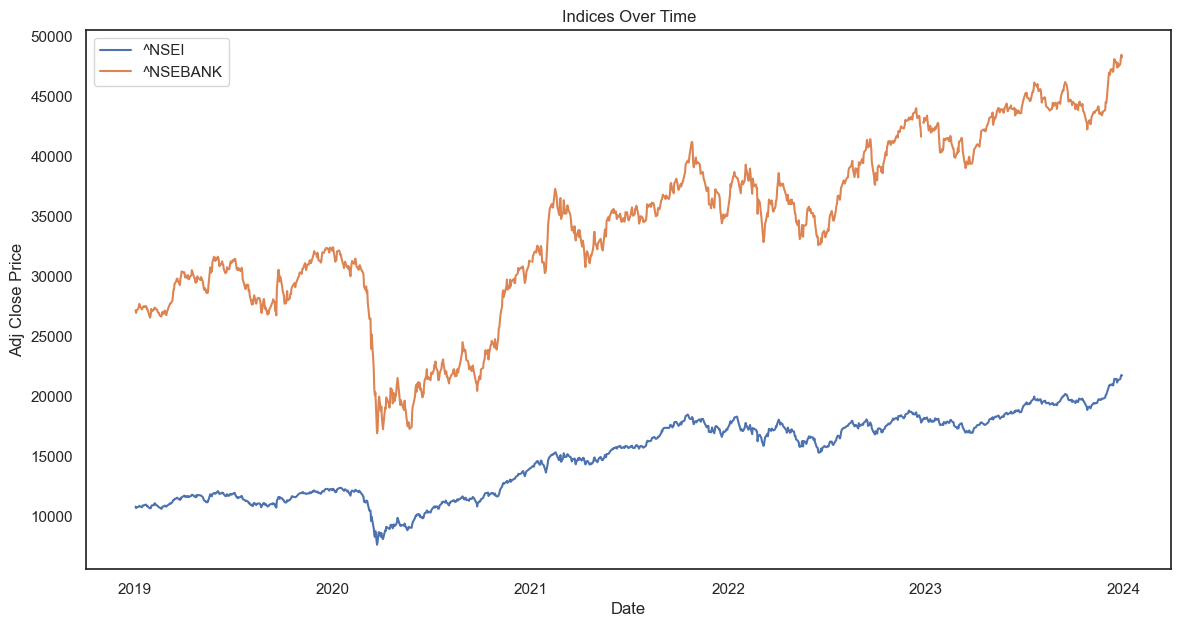

In [77]:
# Function to fetch historical stock and index data from Yahoo Finance
def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Define the stock symbols, index symbols, and date range
stock_symbols = ['APOLLOHOSP.NS', 'CIPLA.NS', 'DIVISLAB.NS','DRREDDY.NS', 'SUNPHARMA.NS']  # Example stock symbols
index_symbols = ['^NSEI', '^NSEBANK']  # Example index symbols
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock and index data
stock_data = get_data(stock_symbols, start_date, end_date)
index_data = get_data(index_symbols, start_date, end_date)

# Plotting the stock prices
plt.figure(figsize=(14, 7))
for stock_symbol in stock_symbols:
    plt.plot(stock_data[stock_symbol], label=stock_symbol)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

# Plotting the indices
plt.figure(figsize=(14, 7))
for index_symbol in index_symbols:
    plt.plot(index_data[index_symbol], label=index_symbol)

plt.title('Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

# Volatility Analysis:

## Calculate and analyse the volatility of each stock and index.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


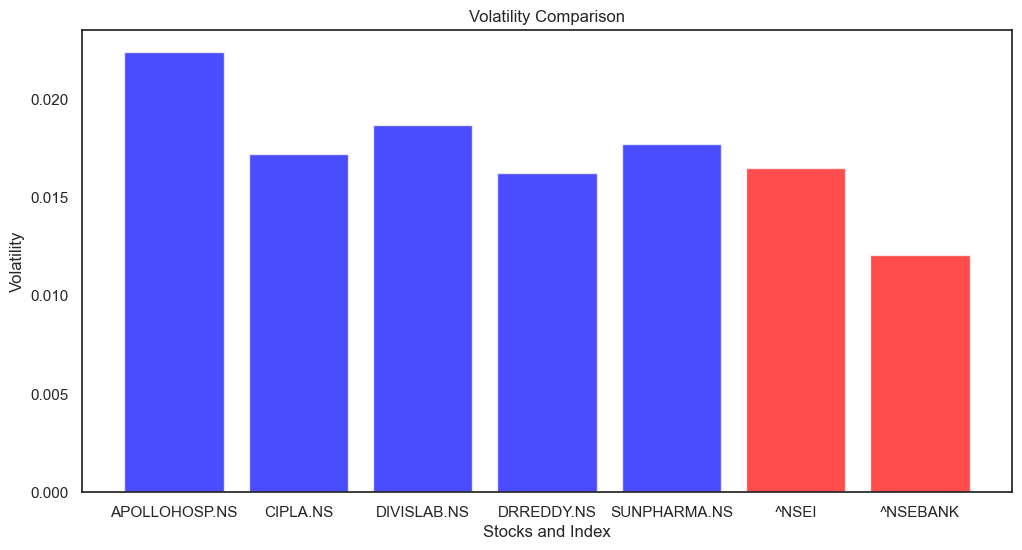

Stock Volatilities:
APOLLOHOSP.NS    0.022372
CIPLA.NS         0.017193
DIVISLAB.NS      0.018683
DRREDDY.NS       0.016256
SUNPHARMA.NS     0.017729
dtype: float64

Index Volatility:
^NSEBANK    0.016501
^NSEI       0.012040
dtype: float64


In [78]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate volatility
def calculate_volatility(returns):
    return returns.std()

# Define the stock tickers and index
stock_tickers = ['APOLLOHOSP.NS', 'CIPLA.NS', 'DIVISLAB.NS','DRREDDY.NS', 'SUNPHARMA.NS']
index_ticker = '^NSEI','^NSEBANK'  # S&P 500 as an example

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data for each stock and index
stock_data = pd.DataFrame({ticker: get_stock_data(ticker, start_date, end_date) for ticker in stock_tickers})
index_data = get_stock_data(index_ticker, start_date, end_date)

# Calculate daily returns for each stock and index
stock_returns = stock_data.pct_change().dropna()
index_returns = index_data.pct_change().dropna()

# Calculate volatility for each stock and index
stock_volatility = stock_returns.apply(calculate_volatility)
index_volatility = calculate_volatility(index_returns)

# Plotting the volatility
plt.figure(figsize=(12, 6))

for ticker in stock_tickers:
    plt.bar(ticker, stock_volatility[ticker], color='blue', alpha=0.7)

plt.bar(index_ticker, index_volatility, color='red', alpha=0.7)

plt.title('Volatility Comparison')
plt.xlabel('Stocks and Index')
plt.ylabel('Volatility')
plt.show()

# Display the calculated volatilities
print("Stock Volatilities:")
print(stock_volatility)

print("\nIndex Volatility:")
print(index_volatility)

# Seasonal Patterns:

## Check for any seasonal patterns or recurring trends in stock prices.


[*********************100%%**********************]  1 of 1 completed
              Open         High          Low        Close    Adj Close  Volume
Date                                                                          
2019-01-01  1253.0  1271.000000  1250.000000  1266.400024  1248.808350  292677
2019-01-02  1268.0  1288.000000  1251.800049  1258.750000  1241.264771  658775
2019-01-03  1258.0  1273.000000  1254.050049  1266.650024  1249.054932  322081
2019-01-04  1259.0  1297.300049  1259.000000  1293.000000  1275.038818  725206
2019-01-07  1299.0  1300.000000  1275.000000  1282.099976  1264.290405  683914


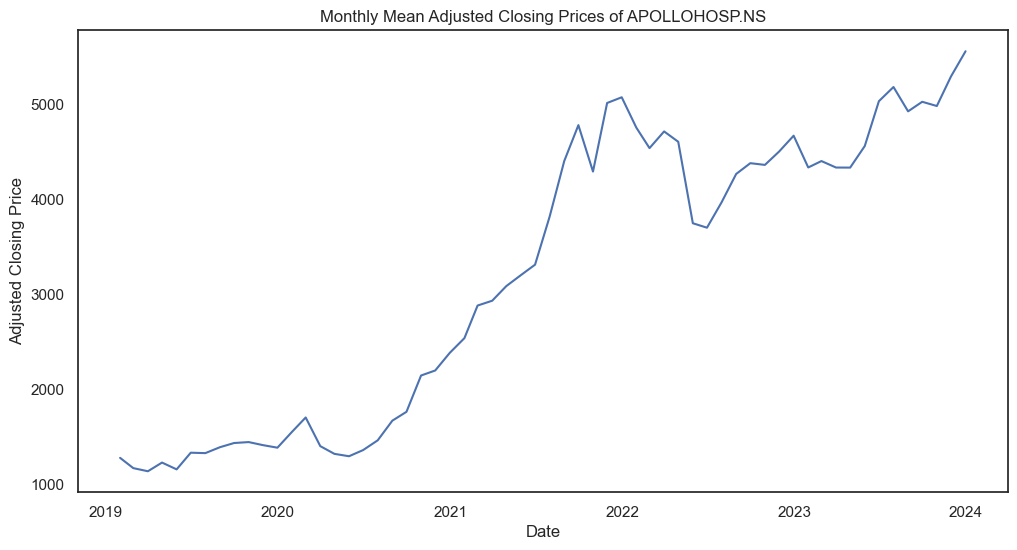

In [79]:
# Define the stock symbol and the time period
stock_symbol = "APOLLOHOSP.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-01  520.000000  524.000000  518.650024  523.049988  509.215485   
2019-01-02  521.900024  522.500000  513.150024  514.549988  500.940338   
2019-01-03  516.500000  520.500000  511.200012  512.400024  498.847229   
2019-01-04  513.000000  514.900024  508.049988  512.799988  499.236572   
2019-01-07  516.000000  517.750000  510.299988  514.049988  500.453522   

             Volume  
Date                 
2019-01-01  1361809  
2019-01-02  1243067  
2019-01-03  2086150  
2019-01-04  1651456  
2019-01-07  1168002  


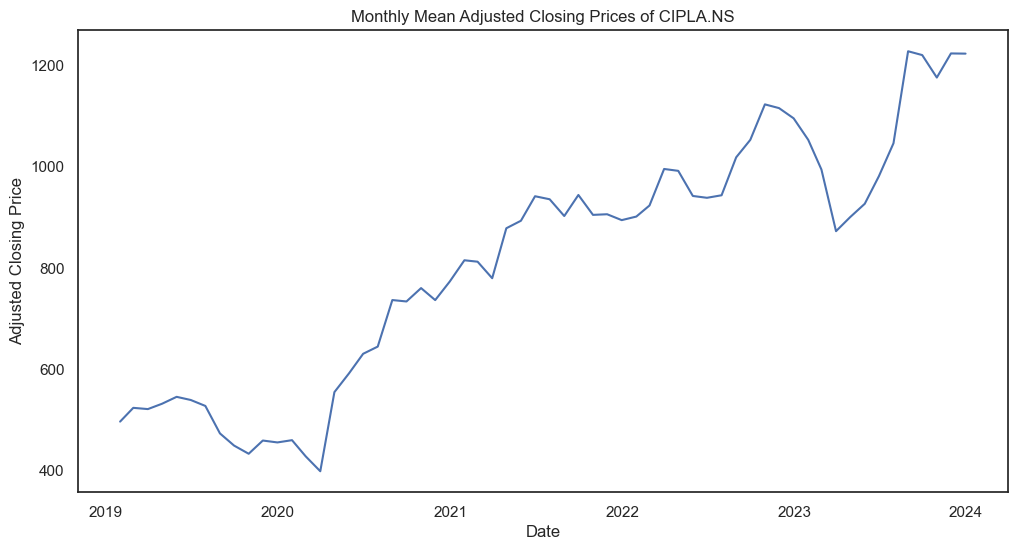

In [80]:
# Define the stock symbol and the time period
stock_symbol = "CIPLA.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  1485.000000  1491.050049  1469.050049  1475.449951  1420.798706   
2019-01-02  1476.900024  1483.599976  1461.400024  1470.900024  1416.417358   
2019-01-03  1479.599976  1482.800049  1432.099976  1437.900024  1384.639648   
2019-01-04  1437.900024  1471.199951  1428.250000  1460.500000  1406.402466   
2019-01-07  1470.000000  1495.000000  1461.349976  1486.000000  1430.957764   

            Volume  
Date                
2019-01-01  254899  
2019-01-02  247208  
2019-01-03  536515  
2019-01-04  391849  
2019-01-07  456830  


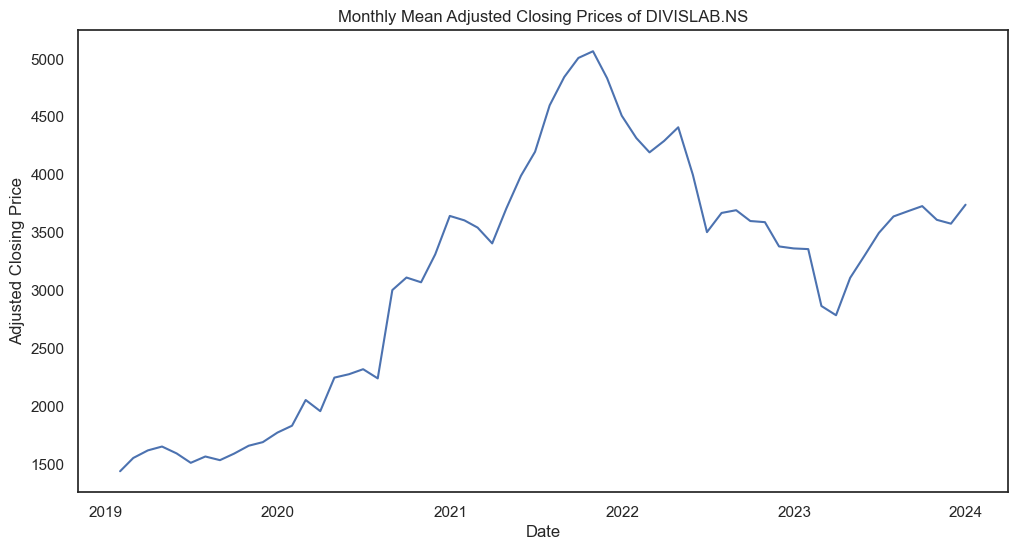

In [81]:
# Define the stock symbol and the time period
stock_symbol = "DIVISLAB.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  2618.100098  2634.000000  2600.000000  2607.050049  2493.476807   
2019-01-02  2606.000000  2618.000000  2575.050049  2601.050049  2487.738037   
2019-01-03  2605.000000  2614.800049  2564.000000  2577.350098  2465.070801   
2019-01-04  2580.000000  2606.000000  2562.000000  2600.000000  2486.733643   
2019-01-07  2613.850098  2613.850098  2537.300049  2558.649902  2447.184814   

            Volume  
Date                
2019-01-01  338757  
2019-01-02  417551  
2019-01-03  541891  
2019-01-04  407397  
2019-01-07  542415  


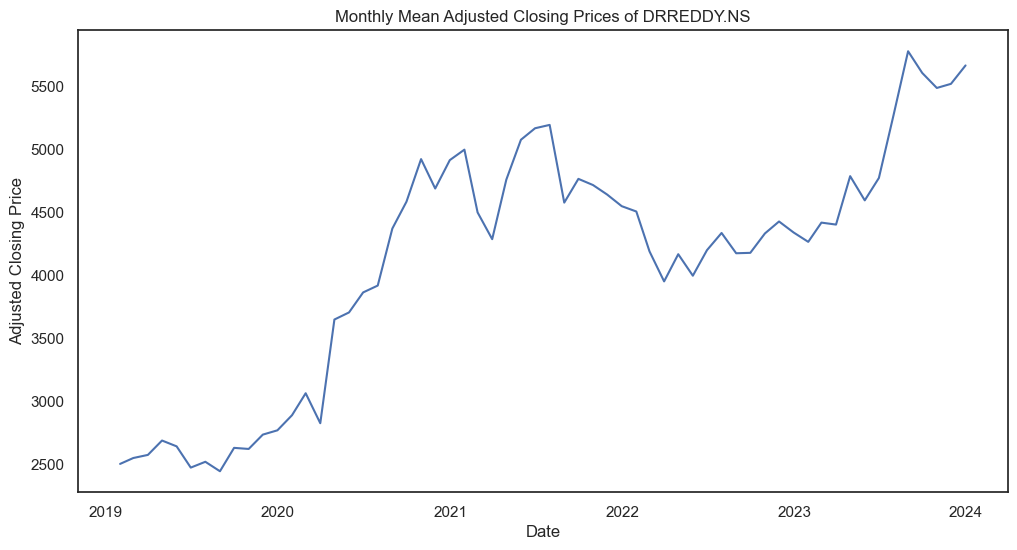

In [82]:
# Define the stock symbol and the time period
stock_symbol = "DRREDDY.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-01  432.500000  438.799988  429.649994  433.549988  412.794830   
2019-01-02  430.500000  441.200012  429.250000  440.049988  418.983734   
2019-01-03  442.049988  443.600006  434.000000  436.100006  415.222870   
2019-01-04  439.100006  439.899994  432.200012  433.799988  413.032898   
2019-01-07  437.100006  438.000000  429.299988  430.799988  410.176544   

             Volume  
Date                 
2019-01-01  8487116  
2019-01-02  9656878  
2019-01-03  9479511  
2019-01-04  6228693  
2019-01-07  4118235  


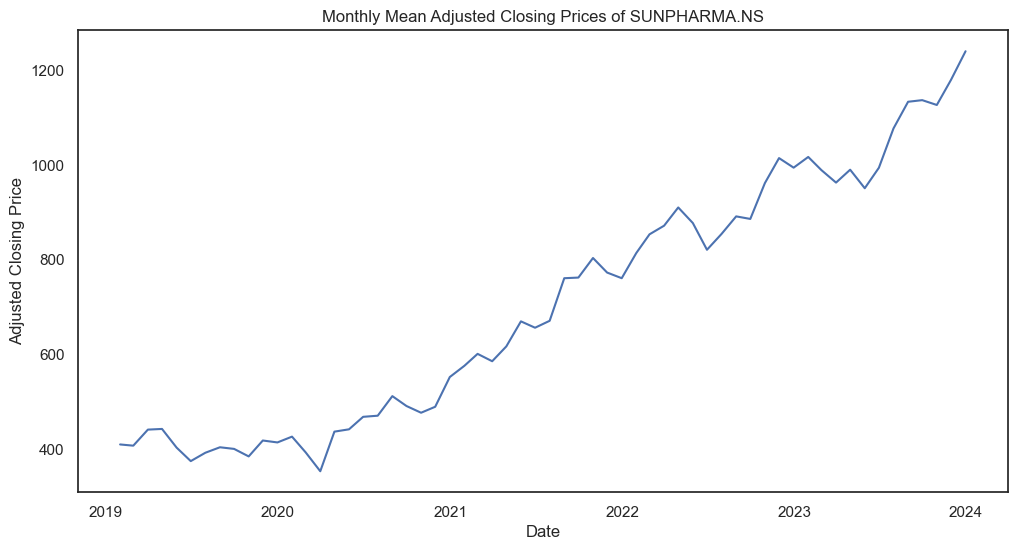

In [83]:
# Define the stock symbol and the time period
stock_symbol = "SUNPHARMA.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

# Financial Ratios:


### Calculate and analyse key financial ratios for each company.


In [84]:
# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(stock_data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch financial data
financial_data = get_financial_data(stock_tickers, start_date, end_date)

# Calculate ratios
financial_ratios = calculate_ratios(financial_data)

# Display the calculated ratios
print("Financial Ratios:")
print(financial_ratios)

Financial Ratios:
               Return on Equity (ROE)  Return on Assets (ROA)  \
APOLLOHOSP.NS                     NaN                0.000084   
CIPLA.NS                          NaN                0.000328   
DIVISLAB.NS                       NaN                0.000085   
DRREDDY.NS                        NaN                0.000065   
SUNPHARMA.NS                      NaN                0.000380   

               Debt to Equity Ratio  
APOLLOHOSP.NS             -0.190034  
CIPLA.NS                  -1.148654  
DIVISLAB.NS               -0.340967  
DRREDDY.NS                -0.256219  
SUNPHARMA.NS              -1.000000  


### Compare ratios across companies and sectors.


In [85]:
# List of stock tickers for the companies you want to analyze
sector_tickers = {'Healthcare':  ['APOLLOHOSP.NS', 'CIPLA.NS', 'DIVISLAB.NS','DRREDDY.NS', 'SUNPHARMA.NS'], 'Agriculture': ['BBTC.NS', 'EIDPARRY.NS', 'PATANJALI.NS','RENUKA.NS', 'TATACONSUM.NS']}

# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios

# Function to compare ratios across companies and sectors
def compare_ratios(companies, sector_data):
    comparisons = pd.DataFrame()

    for company in companies:
        company_data = get_financial_data([company], start_date, end_date)
        company_ratios = calculate_ratios(company_data)
        comparisons[company] = company_ratios.iloc[:, 0]  # Assuming ROE for comparison

    for sector, sector_companies in sector_data.items():
        sector_data = get_financial_data(sector_companies, start_date, end_date)
        sector_ratios = calculate_ratios(sector_data)
        comparisons[sector] = sector_ratios.mean(axis=1)

    return comparisons

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Compare ratios across companies and sectors
comparison_data = compare_ratios(stock_tickers, sector_tickers)

# Display the comparison data
print("Comparison of Ratios:")
print(comparison_data)

Comparison of Ratios:
           APOLLOHOSP.NS  CIPLA.NS  DIVISLAB.NS  DRREDDY.NS  SUNPHARMA.NS  \
Open            0.267045  0.267045     0.267045    0.267045      0.267045   
High            0.248624  0.248624     0.248624    0.248624      0.248624   
Low             0.263026  0.263026     0.263026    0.263026      0.263026   
Close           0.257396  0.257396     0.257396    0.257396      0.257396   
Adj Close       0.267350  0.267350     0.267350    0.267350      0.267350   
Volume               inf       inf          inf         inf           inf   

           Healthcare  Agriculture  
Open        -0.237477    -0.237477  
High        -0.245024    -0.245024  
Low         -0.236181    -0.236181  
Close       -0.239241    -0.239241  
Adj Close   -0.244090    -0.244090  
Volume            inf          inf  
